In [1]:
import oritelib as orite 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calc_kmer_density(kmer_list):
    kmer_list_plus_d = []
    for touple in kmer_list:
        this_kmer = touple[0]
        this_list = touple[1]
        this_occurance = this_list[0]
        start = this_list[1]
        stop = this_list[len(this_list)-1]
        this_density = this_list[0] /((stop-start))
        print("hej")
    return kmer_list_plus_d

In [34]:
class NC_region:
    def __init__(self, start_stop_tuple):
        self.start = int(start_stop_tuple[0])
        self.stop = int(start_stop_tuple[1])
        self.length = (self.stop - self.start) +1
        self.kmer_info = {}
        
    #def __str__(self):
        #return str(self.start)
    
    def add_sequence(self,string):
        self.sequence = string
        
    def add_cgc_val(self,cgc_val):
        self.cgc_val = cgc_val
        
    def add_gc_val(self,gc_val):    
        self.gc_val = gc_val
    
    def add_kmer_counts(self, k):
        kmer_dict = orite.get_kmers(self.sequence, k, circular=False)
        self.kmer_info.update({k: kmer_dict})
    
    def filter_kmer_by_occurence(self, n):
        for key, value in self.kmer_info.items():
            self.kmer_info[key] = orite.get_kmer_by_occurence(value, n)
            
    def filter_top_n_kmers(self, n):
        for key, value in self.kmer_info.items():
            self.kmer_info[key] = orite.get_top_n_kmers(value, n)
    def calc_kmer_density(self):
        for key, value in self.kmer_info.items():
            self.kmer_info[key] = orite.calc_kmer_density(value)
            

In [41]:
def calc_score_for_NC_region(cgc_curve, nc_obj):
    inter = list(range(nc_obj.start, nc_obj.stop+1))
    region_cgc_vals = cgc_curve[inter]
    
    score= -np.average(region_cgc_vals)
    
    nc_obj.add_cgc_val(score)
    

def add_sequence_to_region(seq, nc_obj):
    nc_obj.add_sequence(seq[nc_obj.start:nc_obj.stop +1])





In [5]:
cgc_curve = np.array(list(range(100)))

In [6]:
t1 = (0, 54)
nc1 = NC_region(t1)
seq_dummy = "TATTCCTGGTAAATAAATAATAAATAAATAATAATAATGCGCGCCGCCCGCGCG"#str(list(range(100)))
nc1.add_sequence(seq_dummy)
nc1.add_kmer_counts(3)
nc1.add_kmer_counts(4)

In [7]:
nc1.filter_top_n_kmers(5)


In [10]:
nc1.kmer_info

{3: [('AAT', [8, 11, 15, 18, 22, 26, 29, 32, 35], 0.3333333333333333),
  ('TAA', [8, 9, 13, 17, 20, 24, 28, 31, 34], 0.32),
  ('ATA', [7, 12, 16, 19, 23, 27, 30, 33], 0.3333333333333333),
  ('CGC', [5, 39, 41, 44, 48, 50], 0.45454545454545453),
  ('GCG', [4, 38, 40, 49, 51], 0.3076923076923077)],
 4: [('ATAA', [7, 12, 16, 19, 23, 27, 30, 33], 0.3333333333333333),
  ('AATA', [7, 11, 15, 18, 22, 26, 29, 32], 0.3333333333333333),
  ('TAAT', [4, 17, 28, 31, 34], 0.23529411764705882),
  ('AAAT', [4, 10, 14, 21, 25], 0.26666666666666666),
  ('TAAA', [4, 9, 13, 20, 24], 0.26666666666666666)]}

In [9]:
nc1.calc_kmer_density()

In [18]:
sequence = orite.seq_from_fasta("test_data/eco_k12.fasta")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/eco_k12.gb")[0]
gc, cgc = orite.gc_skew_sliding_window(sequence, 250000)

seq len:  4641652
window_rad:  250000
extended seq length:  5141652


In [42]:
nc_objcts = []
for i in range(len(nc_intervals)):
    nc_obj = NC_region(nc_intervals[i])
    add_sequence_to_region(sequence, nc_obj)
    calc_score_for_NC_region(cgc, nc_obj)
    nc_objcts.append(nc_obj)

In [43]:
print(nc_objcts[1].cgc_val)

-10.440506845860122


In [44]:
region_pos = []
region_score = []

for region in nc_objcts:
    region_pos.append(region.start)
    region_score.append(region.cgc_val)

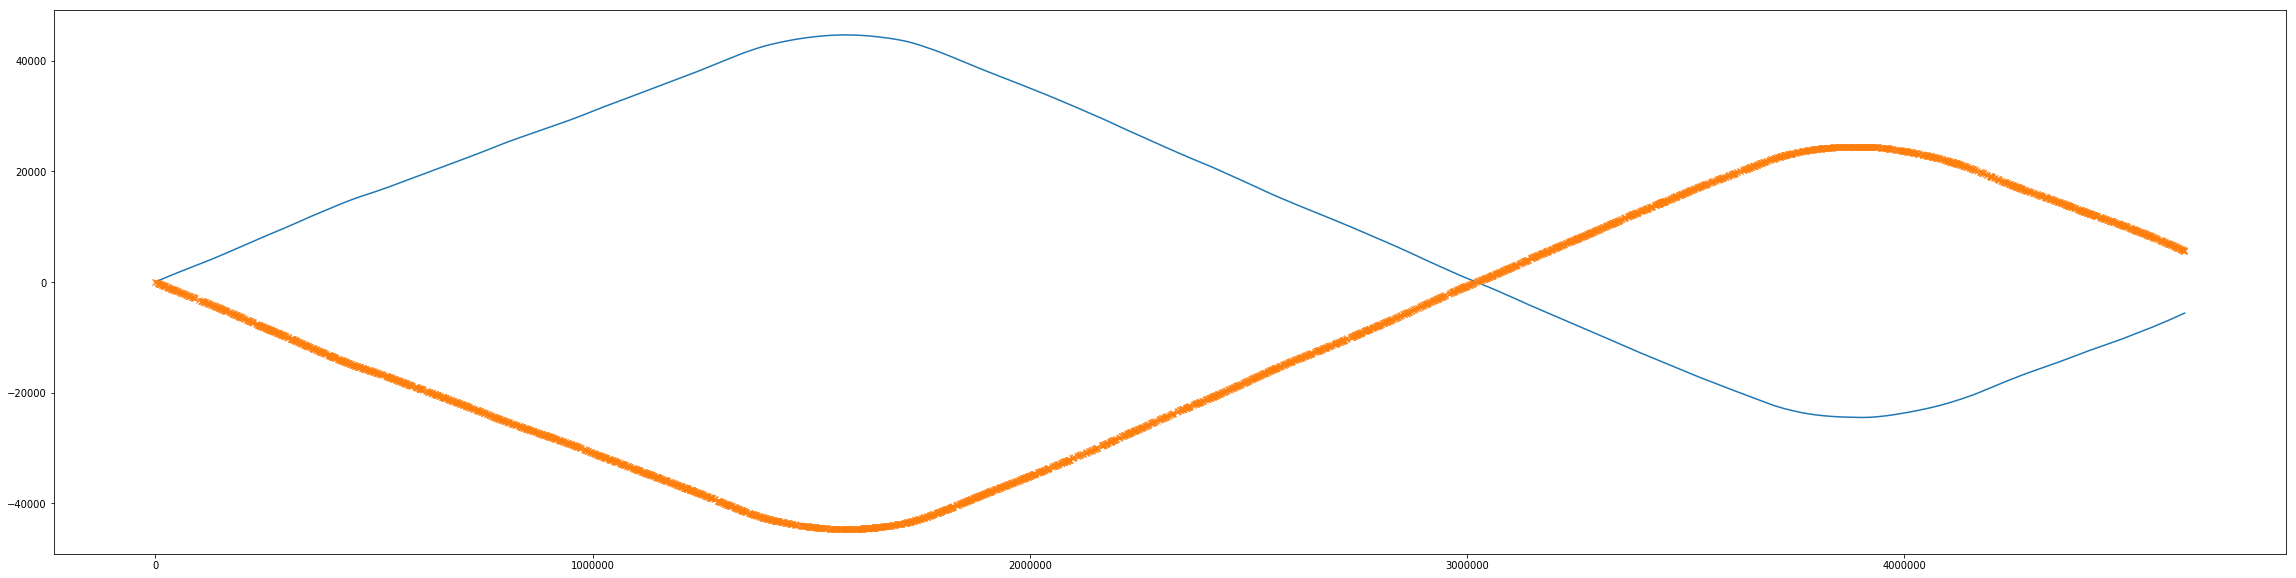

In [48]:
plt.figure(figsize=[40,10])
plt.plot(cgc)

plt.plot(region_pos, region_score, 'x')

In [51]:
region_lengths = []
for region in nc_objcts:
    region_lengths.append(region.length)

In [58]:
def filter_regions_by_length(regions_list, length):
    new_region_list = []
    
    for region in regions_list:
        if region.length > length:
            new_region_list.append(region)
    return new_region_list

In [63]:
filtered_nc_objcts = filter_regions_by_length(nc_objcts, 27)

In [76]:
for region in filtered_nc_objcts:
    print(region.cgc_val)

24494.805125989602
24494.709558219092
24494.645782493357
24494.503782919655
24494.204835143424
24493.886483796457
24493.327214137145
24493.143880347896
24492.33491943903
24491.33271005447
24489.34372690527
24488.53438150548
24487.1391058959
24486.61035734459
24484.58765508624
24484.14427635277
24483.304959328118
24482.01251978576
24480.546770480676
24477.31595229633
24476.614197637853
24474.31772570992
24465.776768537988
24464.669015116167
24459.215632665175
24458.403352416084
24457.257328326057
24454.23472570968
24454.1940683318
24451.318980285738
24444.295886200456
24441.09745142041
24440.53600674675
24438.206898567558
24433.8716366587
24429.478190334416
24427.927837325617
24426.516928322297
24420.82463424932
24414.732192489068
24414.19641533724
24411.772817721747
24401.95603756307
24401.39833607895
24400.371543843186
24392.49030601967
24390.89971436627
24389.463204809887
24381.49944836897
24375.1860355308
24367.298830168875
24361.169646297396
24352.88169873454
24345.95358157145
2434

-7080.423393721826
-7084.4467573679685
-7113.376165829711
-7120.201760874414
-7175.901239435477
-7181.18753194849
-7218.469054841079
-7239.17986802328
-7249.7063480592915
-7260.734340949924
-7312.510149924986
-7357.7133513139415
-7379.4255134577825
-7418.951390685045
-7439.006199438448
-7463.865067893928
-7501.452698856361
-7584.669556395585
-7606.981272031756
-7662.53735369729
-7712.232210183047
-7720.749488139125
-7738.628603873697
-7740.343487351772
-7753.471182111546
-7780.479567078973
-7782.996652957018
-7806.121434098184
-7818.414103118429
-7837.9463392431635
-7847.723763115519
-7856.840065664222
-7889.48843443517
-7898.508437384421
-7928.4679323904165
-7937.422609249849
-7948.070783379499
-8036.445241404637
-8063.773494295728
-8116.699812825405
-8120.18388847255
-8144.634400339098
-8176.370147914285
-8199.74391888542
-8221.653878252584
-8262.570551899371
-8287.38569301703
-8296.096549153215
-8315.250880895586
-8324.689183045219
-8368.585894850232
-8398.417396430365
-8450.8286936

-21888.949812595223
-21925.04207860692
-21930.828713498107
-21963.28177328754
-21979.49174354939
-21980.281894629265
-21991.08579480196
-22034.3606536023
-22055.242891274203
-22084.934951616437
-22159.303663464507
-22189.93319877208
-22214.384420036647
-22257.14686395704
-22318.87143023327
-22370.638392436882
-22382.4347790141
-22402.59974687286
-22423.674463350064
-22436.583810844397
-22464.22917447036
-22467.917178040712
-22492.79317720018
-22511.708572377494
-22535.505882916696
-22535.990535160632
-22554.580085218888
-22579.933801240273
-22580.166037689673
-22651.124897506004
-22692.786537704862
-22705.623621410916
-22723.620693825116
-22765.002006343293
-22914.385290837403
-22945.146860954803
-22959.678362706974
-23006.015068633165
-23017.81392271933
-23045.411245435105
-23099.007788545772
-23102.717846867246
-23169.897001959693
-23184.393882543456
-23184.832791396228
-23199.25240055618
-23222.328531712727
-23250.07078315893
-23313.661964968054
-23336.6989127077
-23365.619931418365

-43237.6342007619
-43243.9876266785
-43273.08649734556
-43288.955080578075
-43289.27779705712
-43304.829560461
-43315.34796457976
-43337.07421626766
-43339.626633509455
-43353.51477021637
-43360.0092604637
-43379.647993521256
-43402.87884009668
-43416.03059481606
-43423.08351094641
-43430.081094216606
-43436.94078122028
-43446.719420519854
-43454.047482431124
-43464.66577823042
-43469.09380099971
-43476.52654163778
-43500.67309068956
-43508.27426811738
-43522.143154601734
-43530.19568004137
-43544.34540317585
-43546.54503284276
-43562.395623339144
-43562.62752971617
-43574.39050782916
-43605.38679444244
-43613.802055667584
-43630.42636050552
-43654.94541491756
-43690.25762431316
-43709.841023405614
-43717.3930704918
-43723.06870431594
-43724.509275005876
-43728.51448202041
-43745.27934322293
-43760.750658601886
-43803.55956866217
-43820.416859562065
-43833.359820457445
-43845.65910511906
-43858.91024652172
-43880.79470006223
-43883.47253687272
-43890.88611031661
-43909.51180482621
-439

In [74]:
def sort_regions_by_score(regions_list):
    regions_list.sort(key=lambda x: x.cgc_val, reverse = True)
    #regions_list.sort(reversed = True)

In [75]:
sort_regions_by_score(filtered_nc_objcts)

In [ ]:
'''

input: list of regions with score value

sort by score
filter top n by score 

return 
output: so

'''